In [1]:
%pylab inline
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.draw

Populating the interactive namespace from numpy and matplotlib


In [13]:
image_ids = next(os.walk("data/validation"))[1]

In [32]:
for path, directories, files in os.walk('data/validation'):
    print(os.path.join("dataset",files[0]))

dataset/3d8912ccb5b9f3b2.jpg
dataset/435eca0e91edcc9f-checkpoint.jpg


In [33]:
arr = os.listdir("data/validation")

In [ ]:
for img in arr:
    print(img)

In [19]:
os.walk('data/validation')

<generator object walk at 0x7f3749e23138>

In [30]:
image_ids = next(os.walk("data/validation"))[1]

In [11]:
image_ids = list(set(image_ids))

In [14]:
for image in image_ids:
    print(image)

.ipynb_checkpoints


In [12]:
file = 'data/validation_mask/7e384a226bd8055c_m06mf6_c9d877fd.png'

In [9]:
os.getcwd()

'/home/jupyter/Segmentation/Mask_RCNN'

In [10]:
# os. chdir('/home/jupyter/Segmentation/Mask_RCNN')

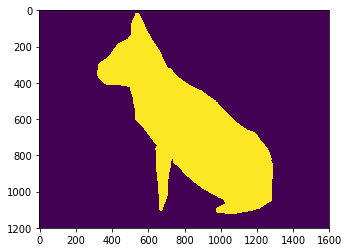

In [13]:
img=mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()

In [78]:
m = skimage.io.imread(file).astype(np.bool)

In [19]:
m.shape

(1200, 1600)

In [71]:
def rle_encode(mask):
    '''Encodes a mask in Run Length Encoding (RLE).
    Return as string of space-seperated values.
    '''

    assert mask.ndim == 2, "Mask must be of shape [Height, Width]"
    # Flatten it column wise
    m = mask.T.flatten()
    # Compute gradient. Equals 1 or -1 at transition points
    g = np.diff(np.concatenate([[0], m, [0]]), n=1)
    # 1-based indices of transition point(where gradient !=0)
    rle = np.where(g != 0)[0].reshape([-1, 2]) + 1
    # Convert second index in each pair to length
    rle[:, 1] = rle[:, 1] - rle[:, 0]
    return " ".join(map(str, rle.flatten()))

In [73]:
rle = rle_encode(m)

In [82]:
def rle_decode(rle, shape):
    '''Decodes an RLE encoded list of space seperated numbers and
    Return binary mask
    '''
    rle = list(map(int, rle.split()))
    rle = np.array(rle, dtype=np.int32).reshape([-1, 2])
    rle[:, 1] += rle[:, 0]
    rle -= 1
    mask = np.zeros([shape[0] * shape[1]], np.bool)
    for s, e in rle:
        print(s,e)
        assert 0 <= s < mask.shape[0]
        assert 1 <= e <= mask.shape[0], "shape: {}  s {}  e {}".format(
            shape, s, e)
        mask[s:e] = 1
    #Reshape and transpose
    mask = mask.reshape([shape[1], shape[0]]).T
    return mask

In [ ]:
x = rle_decode(rle,(1200,1600))

True


In [48]:
g = np.diff([0,1,1,0,1,0,1,0,0,1,0],n=1)
g

array([ 1,  0, -1,  1, -1,  1, -1,  0,  1, -1])

In [53]:
np.where(g !=0)[0]

array([0, 2, 3, 4, 5, 6, 8, 9])

In [69]:
g = np.where(g !=0)[0].reshape([-1,2])  + 1

In [70]:
g[:, 1] = g[:, 1] - g[:, 0]
g

array([[1, 0],
       [2, 0],
       [3, 0],
       [4, 0]])

In [ ]:
" ".join(map(str, rle.flatten()))

In [75]:
os.path.exists('data/train/97fde35e1698e4c9.jpg')

True

In [74]:
os.path.exists('data/train/8dc919a41fd11f0f.jpg')

True

In [14]:
import pandas as pd

In [66]:
df = pd.read_csv("challenge-2019-train-segmentation-masks.csv")

In [50]:
for i, temp_img_id in enumerate(df["ImageID"]):
    p = 0
       

In [51]:
x = []
import os

In [52]:
for i,filepath in enumerate(sorted(glob.glob('{}/*'.format(dataset_dir)))):
    idx = os.path.basename(filepath).split(".")[0]
    for j,ids in enumerate(df["ImageID"]):
        if idx == ids:
            #print("Hey")
            x.append(ids)

KeyboardInterrupt: 

In [55]:
import os.path
os.path.exists("data/train/0c3ed0db08680ed5.jpg")

True

In [67]:
img_ids = []

In [68]:
for i, temp_img_id in enumerate(df["ImageID"]):
    img_path = temp_img_id + ".jpg"
    image_path = os.path.join("data/train", img_path)
    if os.path.exists(image_path):
        img_ids.append(temp_img_id)

In [69]:
len(img_ids)

2125530

In [62]:
img_ids = "b05f306fb030ef8a"

In [10]:
import pandas as pd
df1 = pd.read_csv("challenge-2019-validation-segmentation-masks.csv")

In [11]:
df1.set_index("ImageID", inplace=True)

In [12]:
df1.head()

,MaskPath,LabelName,BoxID,BoxXMin,BoxXMax,BoxYMin,BoxYMax,PredictedIoU,Clicks
ImageID,,,,,,,,,
ce9ec3d3eb1b9d20,ce9ec3d3eb1b9d20_m0h23m_543140c3.png,/m/0h23m,543140c3,0.252019,0.781906,0.266667,0.941414,0.0,NaN
7e384a226bd8055c,7e384a226bd8055c_m06mf6_c9d877fd.png,/m/06mf6,c9d877fd,0.196875,0.807813,0.020833,0.937500,0.0,NaN
0d87b8c4ea2f4c79,0d87b8c4ea2f4c79_m0342h_1a497a11.png,/m/0342h,1a497a11,0.007375,0.880531,0.265487,0.774336,0.0,NaN
c7e5f40a0f905e5b,c7e5f40a0f905e5b_m02rgn06_8dd9da42.png,/m/02rgn06,8dd9da42,0.163717,0.274336,0.079646,0.154867,0.0,NaN
0ea657df47f0dcbb,0ea657df47f0dcbb_m015p6_25470ee8.png,/m/015p6,25470ee8,0.245312,0.657812,0.077083,0.918750,0.0,NaN


In [13]:
x = df1.loc["37de185fc6bdc338"]

In [24]:
y = df1.loc["0191b92699ed127b"]

In [28]:
y.size

9

In [19]:
x.shape

(9, 9)

In [29]:
x.size

81

In [14]:
x.MaskPath

ImageID
37de185fc6bdc338    37de185fc6bdc338_m0dbvp_4863dd71.png
37de185fc6bdc338    37de185fc6bdc338_m09ddx_a397ccca.png
37de185fc6bdc338    37de185fc6bdc338_m0dbvp_9441f2a0.png
37de185fc6bdc338    37de185fc6bdc338_m09ddx_859e3afc.png
37de185fc6bdc338    37de185fc6bdc338_m0dftk_cf98c5ef.png
37de185fc6bdc338    37de185fc6bdc338_m09ddx_7d6ec27f.png
37de185fc6bdc338    37de185fc6bdc338_m0dbvp_a72c215e.png
37de185fc6bdc338    37de185fc6bdc338_m0dftk_25713407.png
37de185fc6bdc338    37de185fc6bdc338_m0dftk_e893e4cd.png
Name: MaskPath, dtype: object

In [15]:
m = x.LabelName

In [18]:
m.shape

(9,)

In [105]:
for i,y in enumerate(x.MaskPath):
    print(x.LabelName)

ImageID
497a4e32b5aeb41d    /m/0jly1
497a4e32b5aeb41d    /m/09b5t
Name: LabelName, dtype: object
ImageID
497a4e32b5aeb41d    /m/0jly1
497a4e32b5aeb41d    /m/09b5t
Name: LabelName, dtype: object


In [164]:
x = 'data/validation/4eb2bf7dc6469b8a.jpg'

In [165]:
subset = os.path.split(os.path.split(x)[0])

In [166]:
subset[1]

'validation'

In [167]:
subset[0]

'data'

In [168]:
mask_dir = os.path.join(subset[0], (subset[1] + "_mask"))

In [169]:
mask_dir

'data/validation_mask'

In [170]:
import skimage.draw

In [173]:
for i,m_path in enumerate(x.MaskPath):
    m = skimage.io.imread(os.path.join(mask_dir, m_path)).astype(np.bool)

In [174]:
m

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [175]:
m.shape

(1059, 1600)

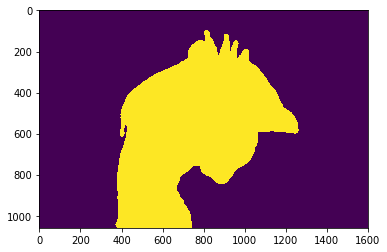

In [178]:
img=mpimg.imread(file)
imgplot = plt.imshow(m)
plt.show()

In [180]:
import model as modellib
import utils
from config import Config

Using TensorFlow backend.


In [278]:
class OpenImageDataset(utils.Dataset):

    def load_openimage(self, dataset_dir, subset):

        # Add classes
        cls_df = pd.read_csv(
            "challenge-2019-classes-description-segmentable.csv", header=None)
        # print(cls_df[1][0])

        for i in range(300):
            self.add_class("openimage", i + 1, cls_df[1][i])
            # print(cls_df[1][i])

        # Train or validation dataset?
        assert subset in ["train", "validation"]
        dataset_dir = os.path.join(dataset_dir, subset)

        df = pd.read_csv("challenge-2019-" + subset +
                         "-segmentation-masks.csv")

        # Getting Image Ids
        img_ids = []
#         for i,filepath in enumerate(sorted(glob.glob('{}/*'.format(dataset_dir)))):
#             idx = os.path.basename(filepath).split(".")[0]
#             img_ids.append(idx)

        for i, temp_img_id in enumerate(df["ImageID"]):
            img_path = temp_img_id + ".jpg"
            image_path = os.path.join(dataset_dir, img_path)
            if os.path.exists(image_path):
                img_ids.append(temp_img_id)


#         for i, filepath in enumerate(sorted(glob.glob('{}/*'.format(dataset_dir)))):
#             idx = os.path.basename(filepath).split(".")[0]
#             for j, ids in enumerate(df["ImageID"]):
#                 if idx == ids:
#                     img_ids.append(ids)

        # Adding of Image
        for i, img_name in enumerate(img_ids):
            file_path = img_name + ".jpg"

            image_path = os.path.join(dataset_dir, file_path)

            self.add_image(
                "openimage",
                image_id=img_name,
                path=image_path
            )

    def load_mask(self, image_id):

        info = self.image_info[image_id]

        subset = os.path.split(os.path.split(info['path'])[0])
        mask_dir = os.path.join(subset[0], (subset[1] + "_mask"))

        cls_df = pd.read_csv(
            "challenge-2019-classes-description-segmentable.csv", header=None)

        class_dict = {}
        for i in range(300):
            class_dict[cls_df[0][i]] = i + 1

        real_id = info["id"]
        df1 = pd.read_csv("challenge-2019-" +
                          subset[1] + "-segmentation-masks.csv")
        df1.set_index("ImageID", inplace=True)

        id_df = df1.loc[real_id]

        mask = []
        temp_class_id = []
        
        if len(id_df) == 9:
            temp_class_id.append(id_df.LabelName)
            m = skimage.io.imread(os.path.join(mask_dir,id_df.MaskPath)).astype(np.bool)
            mask.append(m)
            
        else:
            for j, label in enumerate(id_df.LabelName):
                    temp_class_id.append(label)

            for i, m_path in enumerate(id_df.MaskPath):
                #m = skimage.io.imread(os.path.join(mask_dir,m_path))
                print(m_path)
                m = skimage.io.imread(os.path.join(
                    mask_dir, m_path)).astype(np.bool)
                mask.append(m)

        mask = np.stack(mask, axis=-1)
        class_id = np.empty([mask.shape[-1]], dtype=np.int32)

        for i in range(len(temp_class_id)):
            class_id[i] = class_dict[temp_class_id[i]]

        # print(class_id,mask.shape)

        return mask, class_id

In [279]:
x = OpenImageDataset()

In [280]:
y = x.load_openimage("data","validation")

In [281]:
m,n = x.load_mask(2000)

1d7929b66a611ea8_m02jvh9_d93fba0d.png
1d7929b66a611ea8_m01fh4r_5076ed9a.png
1d7929b66a611ea8_m08hvt4_82f36e1d.png
1d7929b66a611ea8_m054fyh_9a0b7beb.png
1d7929b66a611ea8_m03s_tn_ae4b4df9.png
1d7929b66a611ea8_m02p5f1q_6f069ed6.png


In [282]:
t = x.image_info

In [283]:
t[0]["id"]

'7e384a226bd8055c'

In [284]:
for i in range(len(t)):
    if t[i]["id"] == "9b4890f68823165d":
        print(i)    

358
4188
4565
4919
6808
8155
8888
12812
13014


In [285]:
t[358]

{'id': '9b4890f68823165d',
 'source': 'openimage',
 'path': 'data/validation/9b4890f68823165d.jpg'}

In [286]:
t[4188]

{'id': '9b4890f68823165d',
 'source': 'openimage',
 'path': 'data/validation/9b4890f68823165d.jpg'}

In [276]:
m,n =  x.load_mask(6832)
n

array([259], dtype=int32)

In [239]:
df1 = pd.read_csv("challenge-2019-validation-segmentation-masks.csv")
df1.set_index("ImageID", inplace=True)

In [240]:
df1.head()

,MaskPath,LabelName,BoxID,BoxXMin,BoxXMax,BoxYMin,BoxYMax,PredictedIoU,Clicks
ImageID,,,,,,,,,
ce9ec3d3eb1b9d20,ce9ec3d3eb1b9d20_m0h23m_543140c3.png,/m/0h23m,543140c3,0.252019,0.781906,0.266667,0.941414,0.0,NaN
7e384a226bd8055c,7e384a226bd8055c_m06mf6_c9d877fd.png,/m/06mf6,c9d877fd,0.196875,0.807813,0.020833,0.937500,0.0,NaN
0d87b8c4ea2f4c79,0d87b8c4ea2f4c79_m0342h_1a497a11.png,/m/0342h,1a497a11,0.007375,0.880531,0.265487,0.774336,0.0,NaN
c7e5f40a0f905e5b,c7e5f40a0f905e5b_m02rgn06_8dd9da42.png,/m/02rgn06,8dd9da42,0.163717,0.274336,0.079646,0.154867,0.0,NaN
0ea657df47f0dcbb,0ea657df47f0dcbb_m015p6_25470ee8.png,/m/015p6,25470ee8,0.245312,0.657812,0.077083,0.918750,0.0,NaN


In [242]:
df1.loc["0191b92699ed127b"].MaskPath

'0191b92699ed127b_m0271t_50a2269a.png'

In [249]:
df1.loc["0191b92699ed127b"].MaskPath

'0191b92699ed127b_m0271t_50a2269a.png'

In [257]:
df1.loc["1d7929b66a611ea8"].shape

(6, 9)

In [266]:
len(df1.loc["0191b92699ed127b"]) == 9

True

In [42]:
x = "3d8912ccb5b9f3b2.jpg"

In [43]:
x.split(".")[0]

'3d8912ccb5b9f3b2'

In [1]:
k = 0

In [2]:
for i,x in enumerate("data/train"):
    k += 1

In [6]:
import os

In [7]:
x = os.listdir("data/train")

In [8]:
len(x)

1743043

In [12]:
x = os.listdir("data/validation")

In [13]:
len(x)

29699